In [1]:
import pandas as pd

In [2]:
 df = pd.read_csv('airfoil_self_noise.dat', sep = "\t",  header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


This problem has the following inputs:
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters.
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is:
6. Scaled sound pressure level, in decibels.

In [4]:
df.columns = ['Frequency','Angle of attack','Chord length','Free-stream velocity','Suction side','pressure level']
# name given to the columns

In [5]:
df

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [6]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

### Remove Outliers

In [36]:
def remove_outliers(df,col,k):   # k is num of sd
    mean = df[col].mean()
    global df1              # data frame after removing outliers
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean +k*sd)]
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape)
    print("Number of outliers removed==>",df.shape[0]- df1.shape[0])

In [39]:
remove_outliers(df,'pressure level',2)

(1439, 6)
Number of outliers removed==> 64


In [40]:
df = df1

In [41]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [42]:
x

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1492,630,15.6,0.1016,39.6,0.052849
1493,800,15.6,0.1016,39.6,0.052849
1494,1000,15.6,0.1016,39.6,0.052849
1495,1250,15.6,0.1016,39.6,0.052849


In [43]:
y

0       126.201
1       125.201
2       125.951
3       127.591
4       127.461
         ...   
1492    118.084
1493    118.964
1494    119.224
1495    118.214
1496    114.554
Name: pressure level, Length: 1439, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [46]:
train_x

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
30,250,0.0,0.3048,39.6,0.003101
250,2000,2.0,0.2286,71.3,0.002930
21,2500,0.0,0.3048,55.5,0.002831
397,1000,7.3,0.2286,71.3,0.010440
406,200,7.3,0.2286,55.5,0.011171
...,...,...,...,...,...
1399,800,8.9,0.1016,39.6,0.012460
894,1250,15.4,0.0508,55.5,0.027193
1098,250,9.5,0.0254,31.7,0.004614
520,5000,2.7,0.1524,71.3,0.002439


In [47]:
import seaborn as sns


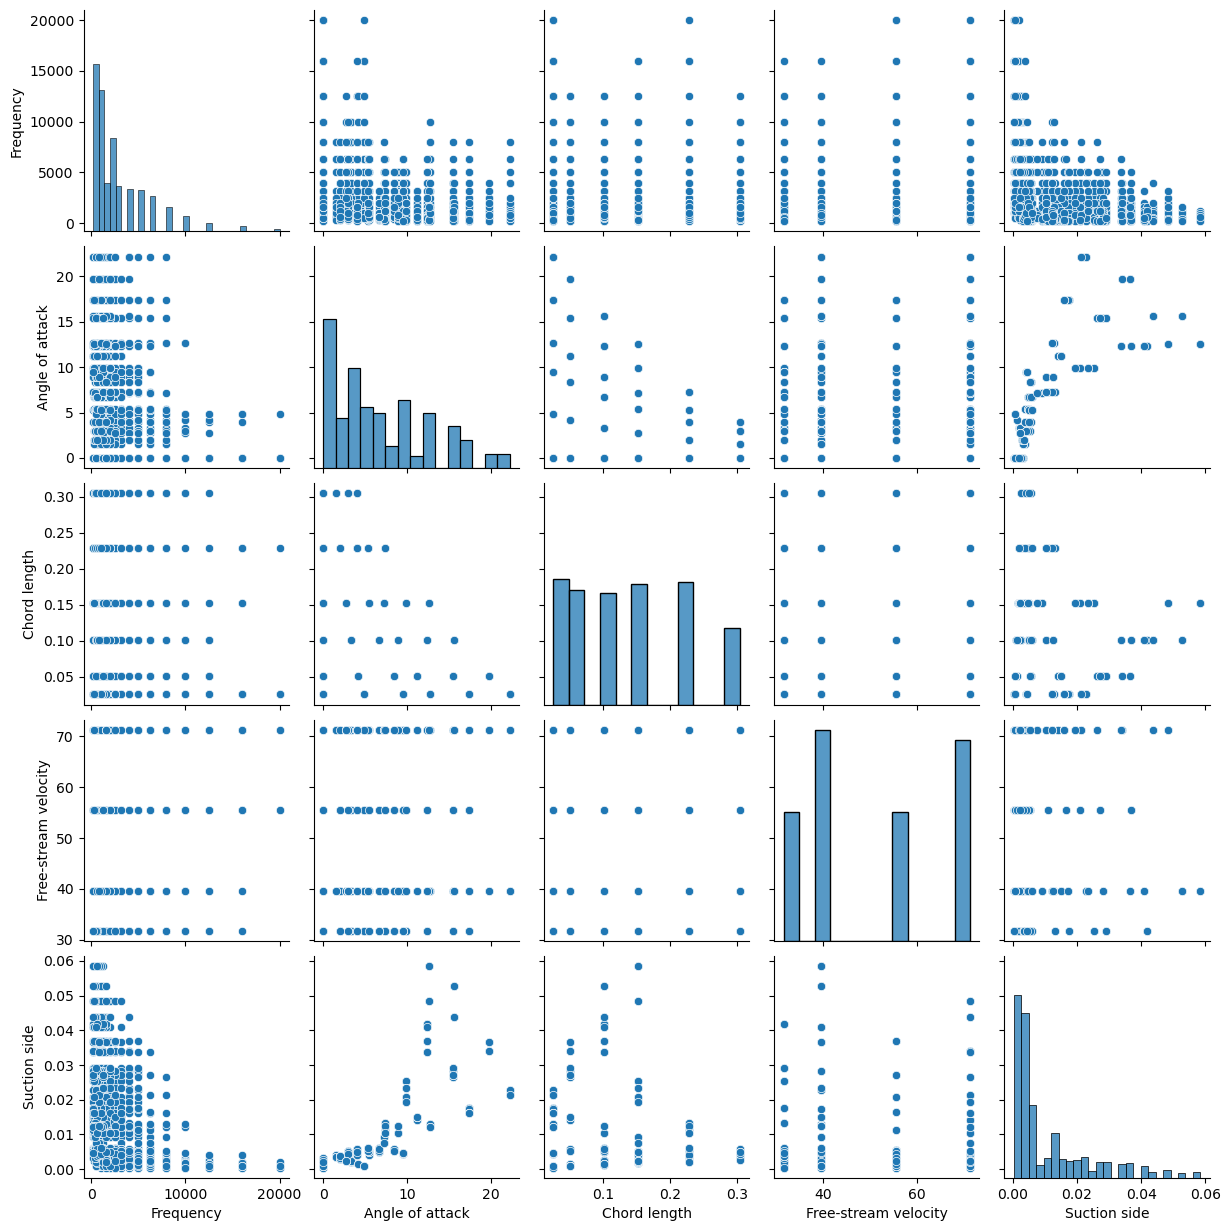

In [48]:
sns.pairplot(train_x)

In [49]:
import matplotlib.pyplot as plt

In [50]:
train_x.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.290496,-0.057945,0.134104,-0.281067
Angle of attack,-0.290496,1.000000,-0.498489,0.045573,0.762848
Chord length,-0.057945,-0.498489,1.000000,0.019088,-0.222113
Free-stream velocity,0.134104,0.045573,0.019088,1.000000,0.019432
Suction side,-0.281067,0.762848,-0.222113,0.019432,1.000000


In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
lr.fit(train_x,train_y)

LinearRegression()

### Rsquare

In [53]:
Rsquare = lr.score(train_x,train_y)
Rsquare

0.452332063075746

In [54]:
N = train_x.shape[0]
K =  train_x.shape[1]

AdjRsqure = 1-((1-Rsquare)*(N-1)/(N-K-1))
AdjRsqure

0.4499405000324086

### Prediction

In [55]:
pred_train = lr.predict(train_x)
pred_test = lr.predict(test_x)

In [56]:
train_err = train_y - pred_train
test_err = test_y - pred_test

### To check the mape,mse,rmse on the test data¶

In [57]:
mse = np.mean(np.square(test_err))  # mean---Squre---Error
rmse = np.sqrt(mse)
mape =  np.mean(np.abs((test_err *100/test_y)))

In [58]:
mse

22.217116712725602

In [59]:
rmse

4.713503655745438

In [60]:
mape

2.987568589004715

In [61]:
import numpy as np

In [62]:
np.mean(train_err)

4.1237406384686965e-15

(array([ 3.,  0.,  1.,  1.,  1.,  0.,  8.,  7.,  6.,  8., 15., 24., 23.,
        46., 31., 46., 58., 67., 98., 87., 86., 64., 80., 51., 63., 60.,
        51., 42., 28., 31., 17., 21.,  9.,  5.,  4.,  5.,  1.,  0.,  1.,
         2.]),
 array([-16.22794225, -15.44742117, -14.6669001 , -13.88637903,
        -13.10585796, -12.32533688, -11.54481581, -10.76429474,
         -9.98377367,  -9.2032526 ,  -8.42273152,  -7.64221045,
         -6.86168938,  -6.08116831,  -5.30064724,  -4.52012616,
         -3.73960509,  -2.95908402,  -2.17856295,  -1.39804188,
         -0.6175208 ,   0.16300027,   0.94352134,   1.72404241,
          2.50456349,   3.28508456,   4.06560563,   4.8461267 ,
          5.62664777,   6.40716885,   7.18768992,   7.96821099,
          8.74873206,   9.52925313,  10.30977421,  11.09029528,
         11.87081635,  12.65133742,  13.4318585 ,  14.21237957,
         14.99290064]),
 <BarContainer object of 40 artists>)

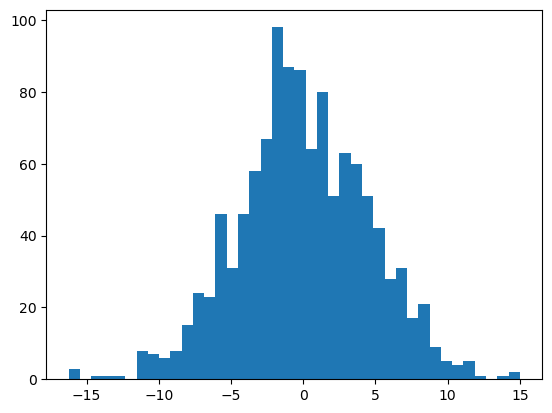

In [63]:
%matplotlib inline
plt.hist(train_err, bins = 40)

In [64]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = train_y
actual_pred['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

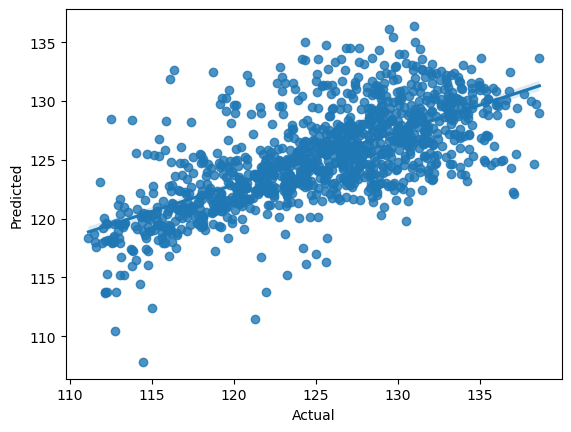

In [65]:
%matplotlib inline
sns.regplot(x = 'Actual',y = 'Predicted',data = actual_pred)

In [73]:
import pickle
pickle_model = pickle.dump(lr, open('model.pkl','wb'))

In [74]:
#!pip install flask

In [77]:
pickle_model = pickle.load(open('model.pkl','rb'))
pickle_model.predict(test_x)

array([128.7325087 , 123.15877713, 128.28262545, 112.90103226,
       134.60319127, 133.12678669, 115.84489453, 120.8943059 ,
       126.27124498, 125.46518354, 119.2622425 , 128.95420302,
       121.63279642, 121.88170753, 132.47938848, 122.08203272,
       123.23454188, 129.35196272, 116.60606828, 133.62008168,
       125.58690867, 124.57405246, 126.92325269, 128.7500783 ,
       120.07922838, 121.26385136, 121.19931805, 131.74375319,
       126.31745215, 120.18133307, 129.00775706, 120.19757439,
       129.16051186, 127.32198367, 126.0270839 , 126.70164852,
       125.25222067, 125.25939249, 132.71014945, 127.28262437,
       120.91115868, 128.04132119, 122.2977094 , 125.70893724,
       128.20566823, 126.17054593, 129.84685359, 126.82110244,
       129.21652392, 127.10071309, 134.73927236, 129.03289511,
       124.63232504, 127.85543093, 129.14599348, 125.15833809,
       127.23256243, 122.71747276, 123.04824466, 120.85116748,
       131.79991114, 123.42146638, 130.68531942, 121.66

### Ridge

In [85]:
from sklearn.linear_model import Ridge
rg = Ridge()

In [86]:
rg.fit(train_x,train_y)

Ridge()

In [87]:
Rsquare = rg.score(train_x,train_y)
Rsquare

0.4356969732774204

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf = RandomForestRegressor()

In [90]:
rf.fit(train_x,train_y)

RandomForestRegressor()

In [91]:
Rsquare = rf.score(train_x,train_y)
Rsquare

0.989522833878523

In [98]:
pred_train = rf.predict(train_x)
pred_test = rf.predict(test_x)

In [99]:
train_err = train_y - pred_train
test_err = test_y - pred_test

In [100]:
mse = np.mean(np.square(test_err))  # mean---Squre---Error
rmse = np.sqrt(mse)
mape =  np.mean(np.abs((test_err *100/test_y)))

In [101]:
mse

2.4970893590104186

In [102]:
rmse

1.5802181365274919

In [103]:
mape

0.9092743771497371

In [104]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = train_y
actual_pred['Predicted'] = pred_train

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

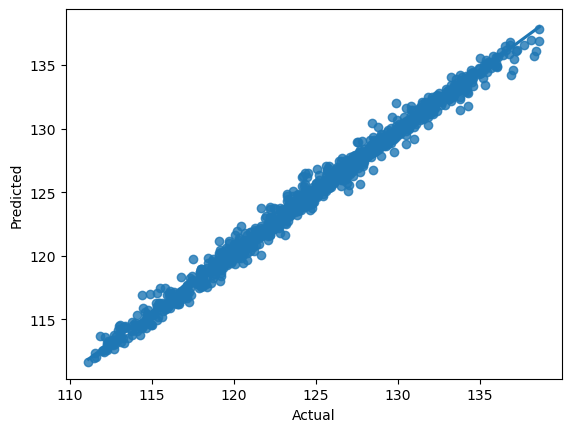

In [105]:
sns.regplot(x = 'Actual',y = 'Predicted',data = actual_pred)

### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
dt = DecisionTreeRegressor()

In [96]:
dt.fit(train_x,train_y)

DecisionTreeRegressor()

In [97]:
Rsquare = dt.score(train_x,train_y)
Rsquare

1.0